Mounting Google Drive

In [1]:
!pip install torchsummary

Importing libraries

In [13]:
import torch
import torchvision
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

from utils import (
   test, train, plot_losses, plot_incorrect_prediction

)

from model import Session9_net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [12]:
train_transforms = A.Compose(
    [
        A.HorizontalFlip(p=0.1),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.CoarseDropout (max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=.45, mask_fill_value = None),
        A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=15, p=0.4),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ]
)
test_transforms = A.Compose(
    [
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
    ]
)

Custom Dataset that support albumentation library

In [14]:
class Cifar10DS(datasets.CIFAR10):
    def __init__(self, root="./data", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label


Downloading MNIST dataset and splitting to train and test set

In [15]:
train_data = Cifar10DS('../data', train=True, download=True, transform=train_transforms)
test_data = Cifar10DS('../data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Creating Data Loaders from train data and test data

In [17]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

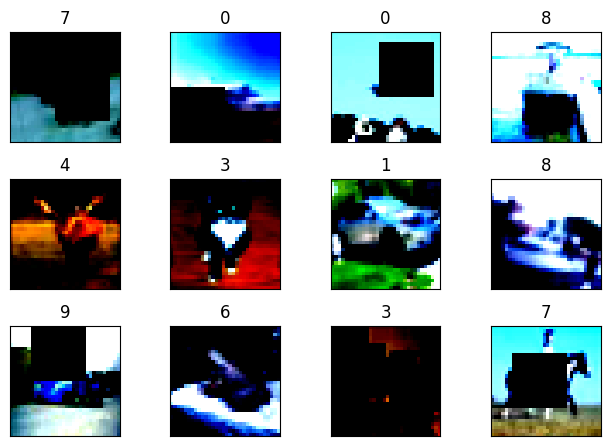

In [18]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(batch_data[i], (1, 2, 0)), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

Transferring model to GPU and printing model summary

In [20]:
model = Session9_net(norm="BN", groupsize=1).to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 24, 32, 32]           2,160
              ReLU-6           [-1, 24, 32, 32]               0
       BatchNorm2d-7           [-1, 24, 32, 32]              48
           Dropout-8           [-1, 24, 32, 32]               0
            Conv2d-9           [-1, 32, 30, 30]           6,912
           Conv2d-10           [-1, 64, 30, 30]          18,432
             ReLU-11           [-1, 64, 30, 30]               0
      BatchNorm2d-12           [-1, 64, 30, 30]             128
          Dropout-13           [-1, 64, 30, 30]               0
           Conv2d-14           [-1, 32,

In [21]:
optimizer = optim.SGD(model.parameters(), lr=0.10, momentum=0.9)
EPOCHS = 60
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=1.6103 Batch_id=97 Accuracy=30.68: 100%|██████████| 98/98 [00:15<00:00,  6.20it/s]


Test set: Average loss: 1.5313, Accuracy: 4319/10000 (43.19%)

EPOCH: 1


Train: Loss=1.5051 Batch_id=97 Accuracy=44.98: 100%|██████████| 98/98 [00:15<00:00,  6.36it/s]


Test set: Average loss: 1.4057, Accuracy: 4970/10000 (49.70%)

EPOCH: 2


Train: Loss=1.2273 Batch_id=97 Accuracy=53.26: 100%|██████████| 98/98 [00:14<00:00,  6.57it/s]


Test set: Average loss: 1.1175, Accuracy: 6004/10000 (60.04%)

EPOCH: 3


Train: Loss=1.0993 Batch_id=97 Accuracy=57.88: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]


Test set: Average loss: 1.0858, Accuracy: 6207/10000 (62.07%)

EPOCH: 4


Train: Loss=1.0996 Batch_id=97 Accuracy=61.24: 100%|██████████| 98/98 [00:14<00:00,  6.60it/s]


Test set: Average loss: 0.9201, Accuracy: 6744/10000 (67.44%)

EPOCH: 5


Train: Loss=0.9678 Batch_id=97 Accuracy=63.89: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]


Test set: Average loss: 1.0057, Accuracy: 6523/10000 (65.23%)

EPOCH: 6


Train: Loss=0.8563 Batch_id=97 Accuracy=66.42: 100%|██████████| 98/98 [00:14<00:00,  6.63it/s]


Test set: Average loss: 0.8105, Accuracy: 7118/10000 (71.18%)

EPOCH: 7


Train: Loss=0.9958 Batch_id=97 Accuracy=68.15: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]


Test set: Average loss: 0.7660, Accuracy: 7321/10000 (73.21%)

EPOCH: 8


Train: Loss=0.7424 Batch_id=97 Accuracy=69.20: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]


Test set: Average loss: 0.7428, Accuracy: 7472/10000 (74.72%)

EPOCH: 9


Train: Loss=0.8164 Batch_id=97 Accuracy=70.52: 100%|██████████| 98/98 [00:14<00:00,  6.58it/s]


Test set: Average loss: 0.7142, Accuracy: 7536/10000 (75.36%)

EPOCH: 10


Train: Loss=0.7783 Batch_id=97 Accuracy=72.01: 100%|██████████| 98/98 [00:14<00:00,  6.70it/s]


Test set: Average loss: 0.6669, Accuracy: 7709/10000 (77.09%)

EPOCH: 11


Train: Loss=0.7379 Batch_id=97 Accuracy=72.44: 100%|██████████| 98/98 [00:14<00:00,  6.63it/s]


Test set: Average loss: 0.6322, Accuracy: 7797/10000 (77.97%)

EPOCH: 12


Train: Loss=0.6833 Batch_id=97 Accuracy=73.48: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.6316, Accuracy: 7845/10000 (78.45%)

EPOCH: 13


Train: Loss=0.6996 Batch_id=97 Accuracy=74.10: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]


Test set: Average loss: 0.6034, Accuracy: 7910/10000 (79.10%)

EPOCH: 14


Train: Loss=0.8653 Batch_id=97 Accuracy=74.72: 100%|██████████| 98/98 [00:15<00:00,  6.15it/s]


Test set: Average loss: 0.6173, Accuracy: 7903/10000 (79.03%)

EPOCH: 15


Train: Loss=0.7883 Batch_id=97 Accuracy=75.57: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s]


Test set: Average loss: 0.5985, Accuracy: 7947/10000 (79.47%)

EPOCH: 16


Train: Loss=0.7102 Batch_id=97 Accuracy=75.82: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.5459, Accuracy: 8126/10000 (81.26%)

EPOCH: 17


Train: Loss=0.6733 Batch_id=97 Accuracy=76.23: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]


Test set: Average loss: 0.5766, Accuracy: 8054/10000 (80.54%)

EPOCH: 18


Train: Loss=0.7041 Batch_id=97 Accuracy=76.84: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 0.5480, Accuracy: 8138/10000 (81.38%)

EPOCH: 19


Train: Loss=0.7368 Batch_id=97 Accuracy=77.52: 100%|██████████| 98/98 [00:15<00:00,  6.49it/s]


Test set: Average loss: 0.5453, Accuracy: 8191/10000 (81.91%)

EPOCH: 20


Train: Loss=0.7070 Batch_id=97 Accuracy=77.50: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]


Test set: Average loss: 0.5222, Accuracy: 8226/10000 (82.26%)

EPOCH: 21


Train: Loss=0.5556 Batch_id=97 Accuracy=77.89: 100%|██████████| 98/98 [00:15<00:00,  6.48it/s]


Test set: Average loss: 0.5328, Accuracy: 8175/10000 (81.75%)

EPOCH: 22


Train: Loss=0.7999 Batch_id=97 Accuracy=78.03: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 0.5251, Accuracy: 8215/10000 (82.15%)

EPOCH: 23


Train: Loss=0.7025 Batch_id=97 Accuracy=78.56: 100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Test set: Average loss: 0.5105, Accuracy: 8282/10000 (82.82%)

EPOCH: 24


Train: Loss=0.5696 Batch_id=97 Accuracy=78.82: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]


Test set: Average loss: 0.5339, Accuracy: 8203/10000 (82.03%)

EPOCH: 25


Train: Loss=0.6361 Batch_id=97 Accuracy=79.22: 100%|██████████| 98/98 [00:15<00:00,  6.53it/s]


Test set: Average loss: 0.5008, Accuracy: 8318/10000 (83.18%)

EPOCH: 26


Train: Loss=0.5240 Batch_id=97 Accuracy=79.62: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]


Test set: Average loss: 0.4996, Accuracy: 8351/10000 (83.51%)

EPOCH: 27


Train: Loss=0.6412 Batch_id=97 Accuracy=79.53: 100%|██████████| 98/98 [00:15<00:00,  6.18it/s]


Test set: Average loss: 0.5172, Accuracy: 8271/10000 (82.71%)

EPOCH: 28


Train: Loss=0.5674 Batch_id=97 Accuracy=79.44: 100%|██████████| 98/98 [00:15<00:00,  6.26it/s]


Test set: Average loss: 0.4739, Accuracy: 8394/10000 (83.94%)

EPOCH: 29


Train: Loss=0.5787 Batch_id=97 Accuracy=80.17: 100%|██████████| 98/98 [00:15<00:00,  6.36it/s]


Test set: Average loss: 0.4916, Accuracy: 8344/10000 (83.44%)

EPOCH: 30


Train: Loss=0.5111 Batch_id=97 Accuracy=80.59: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]


Test set: Average loss: 0.4980, Accuracy: 8338/10000 (83.38%)

EPOCH: 31


Train: Loss=0.5513 Batch_id=97 Accuracy=80.23: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]


Test set: Average loss: 0.4899, Accuracy: 8362/10000 (83.62%)

EPOCH: 32


Train: Loss=0.6562 Batch_id=97 Accuracy=80.27: 100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Test set: Average loss: 0.5051, Accuracy: 8350/10000 (83.50%)

EPOCH: 33


Train: Loss=0.4993 Batch_id=97 Accuracy=80.50: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]


Test set: Average loss: 0.4823, Accuracy: 8389/10000 (83.89%)

EPOCH: 34


Train: Loss=0.5382 Batch_id=97 Accuracy=80.89: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s]


Test set: Average loss: 0.4641, Accuracy: 8454/10000 (84.54%)

EPOCH: 35


Train: Loss=0.4935 Batch_id=97 Accuracy=80.78: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.4619, Accuracy: 8438/10000 (84.38%)

EPOCH: 36


Train: Loss=0.6182 Batch_id=97 Accuracy=81.32: 100%|██████████| 98/98 [00:15<00:00,  6.48it/s]


Test set: Average loss: 0.4617, Accuracy: 8456/10000 (84.56%)

EPOCH: 37


Train: Loss=0.5501 Batch_id=97 Accuracy=81.54: 100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Test set: Average loss: 0.4606, Accuracy: 8477/10000 (84.77%)

EPOCH: 38


Train: Loss=0.4731 Batch_id=97 Accuracy=81.53: 100%|██████████| 98/98 [00:16<00:00,  5.86it/s]


Test set: Average loss: 0.4570, Accuracy: 8443/10000 (84.43%)

EPOCH: 39


Train: Loss=0.4662 Batch_id=97 Accuracy=81.43: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]


Test set: Average loss: 0.4629, Accuracy: 8472/10000 (84.72%)

EPOCH: 40


Train: Loss=0.5805 Batch_id=97 Accuracy=81.86: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]


Test set: Average loss: 0.4736, Accuracy: 8460/10000 (84.60%)

EPOCH: 41


Train: Loss=0.4807 Batch_id=97 Accuracy=81.69: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]


Test set: Average loss: 0.4447, Accuracy: 8447/10000 (84.47%)

EPOCH: 42


Train: Loss=0.5672 Batch_id=97 Accuracy=82.38: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]


Test set: Average loss: 0.4461, Accuracy: 8475/10000 (84.75%)

EPOCH: 43


Train: Loss=0.4700 Batch_id=97 Accuracy=82.08: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]


Test set: Average loss: 0.4459, Accuracy: 8526/10000 (85.26%)

EPOCH: 44


Train: Loss=0.5825 Batch_id=97 Accuracy=82.65: 100%|██████████| 98/98 [00:15<00:00,  6.51it/s]


Test set: Average loss: 0.4647, Accuracy: 8469/10000 (84.69%)

EPOCH: 45


Train: Loss=0.5924 Batch_id=97 Accuracy=82.45: 100%|██████████| 98/98 [00:15<00:00,  6.36it/s]


Test set: Average loss: 0.4490, Accuracy: 8536/10000 (85.36%)

EPOCH: 46


Train: Loss=0.5300 Batch_id=97 Accuracy=82.50: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.4462, Accuracy: 8516/10000 (85.16%)

EPOCH: 47


Train: Loss=0.4402 Batch_id=97 Accuracy=82.82: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]


Test set: Average loss: 0.4648, Accuracy: 8466/10000 (84.66%)

EPOCH: 48


Train: Loss=0.4786 Batch_id=97 Accuracy=82.92: 100%|██████████| 98/98 [00:15<00:00,  6.48it/s]


Test set: Average loss: 0.4390, Accuracy: 8534/10000 (85.34%)

EPOCH: 49


Train: Loss=0.5328 Batch_id=97 Accuracy=82.77: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.4333, Accuracy: 8562/10000 (85.62%)

EPOCH: 50


Train: Loss=0.4921 Batch_id=97 Accuracy=82.67: 100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Test set: Average loss: 0.4318, Accuracy: 8561/10000 (85.61%)

EPOCH: 51


Train: Loss=0.4139 Batch_id=97 Accuracy=82.75: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 0.4626, Accuracy: 8467/10000 (84.67%)

EPOCH: 52


Train: Loss=0.4522 Batch_id=97 Accuracy=83.04: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.4257, Accuracy: 8585/10000 (85.85%)

EPOCH: 53


Train: Loss=0.4229 Batch_id=97 Accuracy=83.26: 100%|██████████| 98/98 [00:15<00:00,  6.53it/s]


Test set: Average loss: 0.4281, Accuracy: 8566/10000 (85.66%)

EPOCH: 54


Train: Loss=0.4512 Batch_id=97 Accuracy=83.39: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.4324, Accuracy: 8552/10000 (85.52%)

EPOCH: 55


Train: Loss=0.4514 Batch_id=97 Accuracy=83.35: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]


Test set: Average loss: 0.4353, Accuracy: 8567/10000 (85.67%)

EPOCH: 56


Train: Loss=0.4562 Batch_id=97 Accuracy=83.28: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]


Test set: Average loss: 0.4251, Accuracy: 8600/10000 (86.00%)

EPOCH: 57


Train: Loss=0.4505 Batch_id=97 Accuracy=83.49: 100%|██████████| 98/98 [00:16<00:00,  6.00it/s]


Test set: Average loss: 0.4524, Accuracy: 8554/10000 (85.54%)

EPOCH: 58


Train: Loss=0.5031 Batch_id=97 Accuracy=83.29: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]


Test set: Average loss: 0.4348, Accuracy: 8567/10000 (85.67%)

EPOCH: 59


Train: Loss=0.4995 Batch_id=97 Accuracy=83.56: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]


Test set: Average loss: 0.4297, Accuracy: 8584/10000 (85.84%)



## Plot Losses

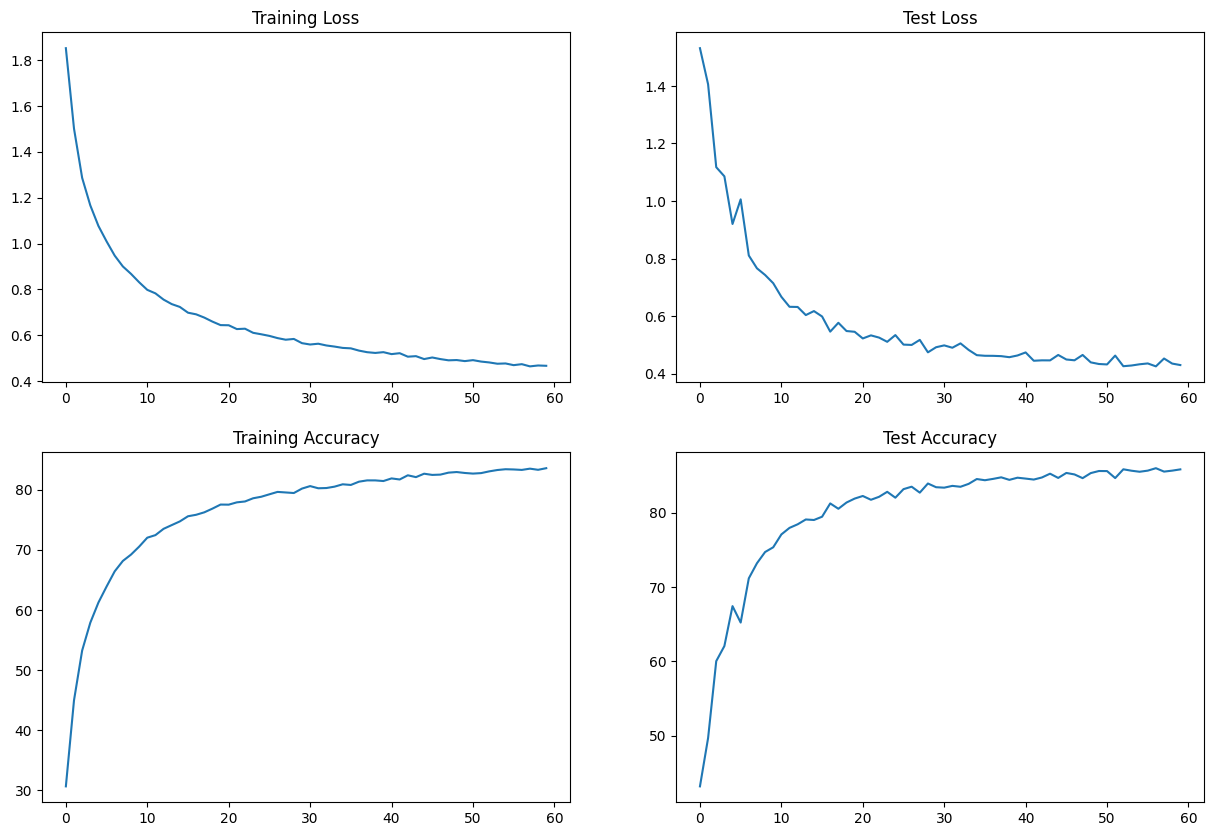

In [24]:
plot_losses()

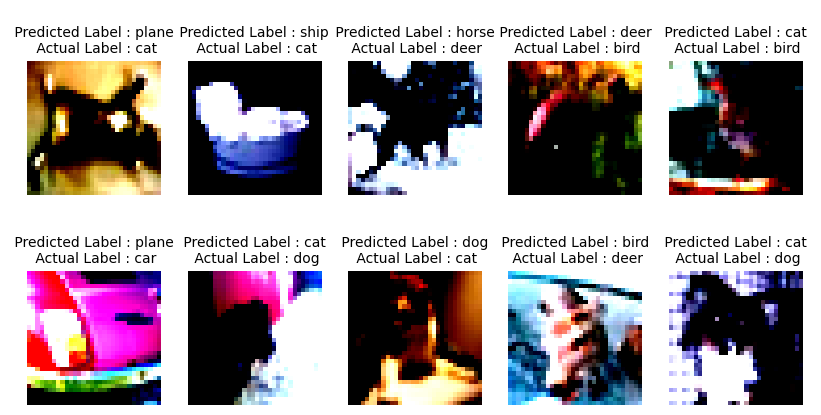

In [25]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the maximum probabilities
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))
plot_incorrect_prediction(wrong_prediction_list, n=10 )